# **Laboratorijska vježba 2**: Zadaci za samostalni rad

## **Podaci o poznatim filmovima i njihovoj zaradi**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka o popularnim filmovima (blockbusterima) te njihov financijski učinak. Skup podataka dostupan je u *Data/blockbusters.csv*. 

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

*   Main_Genre - primarni žanr filma
*   Genre_2 
*   Genre_3
*   imdb_rating
*   length - duljina filma u minutama
*   rank_in_year - rank u top 10 filmova objavljenih te godine
*   rating - ocjena publike
*   studio - studio koji je producirao film
*   title - naslov filma
*   worldwide_gross - ukupni prihod filma u svijetu u dolarima
*   year - godina objavljivanja

In [ ]:
!head Data/blockbusters.csv

Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
Action,Comedy,,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
Action,Comedy,,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
Action,Adventure,Drama,7,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies.head(10)



,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


## **Zadatak 1: Vizualizacija jedne varijable**

Koristeći naučeno znanje, Vaš je zadatak vizualizirati jednu varijablu koristeći biblioteku Matplotlib. Usredotočite se na stupac 'worldwide_gross' te istražite njegovu distribuciju pomoću histograma i dijagrama pravokutnika. Svaki dijagram mora imati prikladno označene osi i naslov (koristite metode *plt.xlabel()*, *plt.ylabel()* i *plt.title()*). 

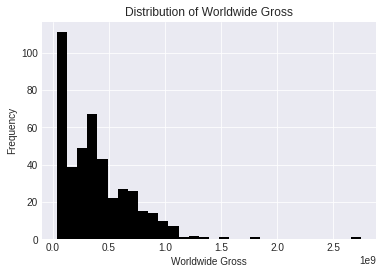

In [ ]:
#Pretvaranje worldwide_gross string u number
plt.hist(movies['worldwide_gross'].replace("$", "").replace(",", ""), bins=30, color = "black")
movies['worldwide_gross'] = movies['worldwide_gross'].astype(float)
plt.xlabel('Worldwide Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Worldwide Gross')
plt.show()

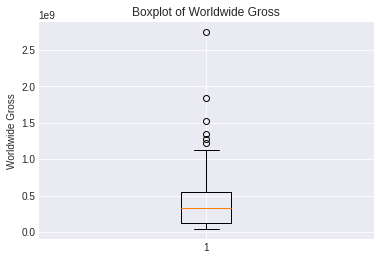

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.boxplot(movies['worldwide_gross'])
plt.ylabel('Worldwide Gross')
plt.title('Boxplot of Worldwide Gross')
plt.show()

## **Zadatak 2: Vizualizacija dviju kontinuiranih varijabli**

Provjerite ispravnost tvrdnje da blockbusteri s većim IMDB rejtingom ujedno ostvaruju i više prihoda. To možete postići vizualizacijom odnosa između dviju varijabli koje sadrže ove informacije, pri čemu je za vizualizaciju prikladno koristiti dijagram raspršenosti.

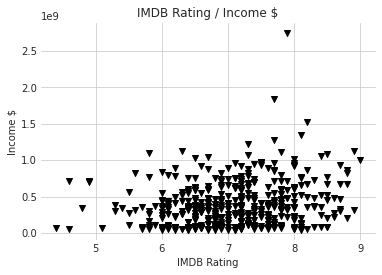

In [ ]:
ratings_gross = movies[['imdb_rating', 'worldwide_gross']]
sns.set_style("whitegrid")
imdb = movies['imdb_rating']
w_gross = movies['worldwide_gross']
plt.scatter(imdb, w_gross, color='black', marker='v')

plt.xlabel('IMDB Rating')
plt.ylabel('Income $')
plt.title('IMDB Rating / Income $')
plt.show()

Na dijagram dodajte tzv. "*best-fit*" pravac koji se koristi za izražavanje odnosa različitih podatkovnih točaka u dijagramu raspršenosti. Ovaj pravac predstavlja pravac koji je najmanje udaljen od svih točaka na grafu. 

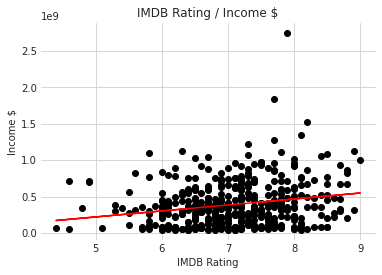

In [ ]:
m, b = np.polyfit(imdb, w_gross, 1)
plt.plot(imdb, m*imdb + b, color='red')

plt.scatter(imdb, w_gross, color='black', marker='o')

plt.xlabel('IMDB Rating')
plt.ylabel('Income $')
plt.title('IMDB Rating / Income $')
plt.show()

Uz vizualizaciju, odnos dviju kontinuiranih varijabli možete numerički iskazati izračunavanjem korelacije. Pomoću biblioteke Pandas izračunajte korelaciju između ovih varijabli te ju ispravno protumačite.

In [ ]:
corr = movies['worldwide_gross'].corr(movies['imdb_rating'])
print(round(corr, 4))

0.2133


Uz odnos ovih dviju varijabli, bilo bi zanimljivo prikazati i razlike u njihovim distribucijama. Ove razlike možete vizualizirati zajedničkim dijagramom (jointplot iz biblioteke Seaborn) koji ujedno prikazuje njihov dijagram raspršenosti te distribucije pomoću stupčastih dijagrama. Prokomentirajte razliku u distribucijama ovih dviju varijabli.

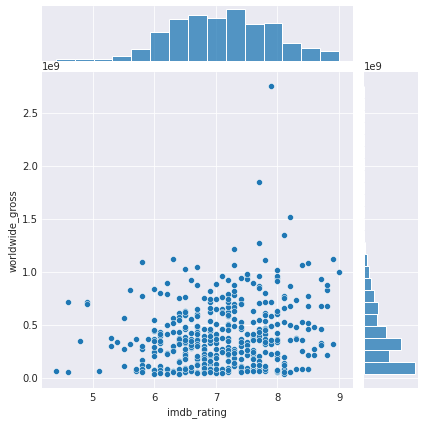

In [ ]:
import seaborn as sns
with sns.axes_style('darkgrid'):
  sns.jointplot(x='imdb_rating', y='worldwide_gross', data=movies, kind='scatter')

## **Zadatak 3: Vizualizacija odnosa kontinuirane i kategoričke varijable**

Razmotrite pet najzastupljenijih žanrova te ispitajte njihove prihode. Vizualizirajte odnos između ovih varijabli koristeći stupčasti dijagram, dijagram pravokutnika te violinske dijagrame. 

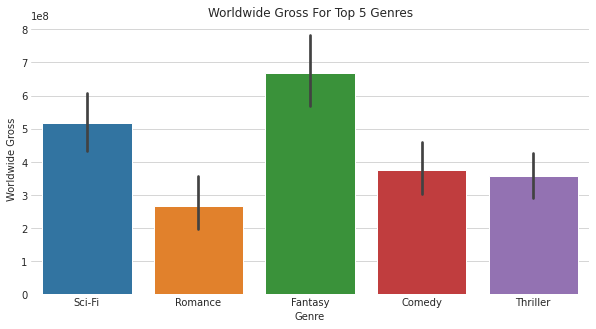

In [ ]:
top_five_genres = movies['Main_Genre'].value_counts().nlargest(5).index
movies_top_genres = movies[movies['Main_Genre'].isin(top_five_genres)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Main_Genre', y='worldwide_gross', data=movies_top_genres)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross For Top 5 Genres')
plt.show()

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

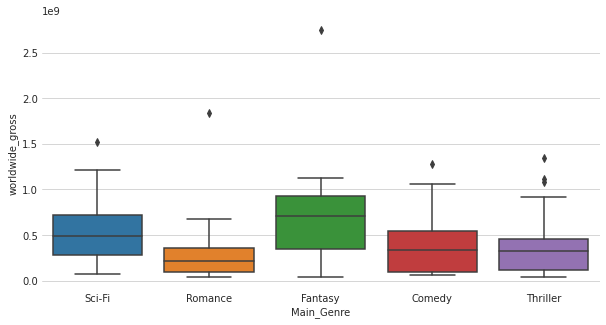

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Main_Genre', y='worldwide_gross', data=movies_top_genres)

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

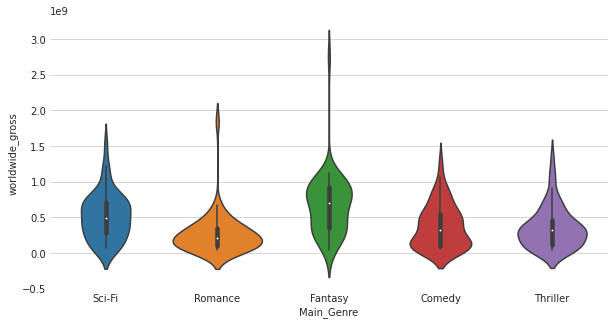

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x='Main_Genre', y='worldwide_gross', data=movies_top_genres)

## **Zadatak 4: Vizualizacija neizvjesnosti**

Pokušajte odgovoriti na pitanje kako bi se kretao prosječni prihod od blockbustera? Vizualizirajte prosječni godišnji svjetski bruto prihod, zajedno sa standardnom devijacijom. Devijaciju možete vizualizirati pomoću vizualizacije grešaka, odnosno metoda *errorbar* i *fill_between* iz biblioteke Matplotlib. Pomoć: grupirajte retke DataFrame-a prema godini te primijenite prikladnu metodu agregacije nad stupcem od interesa.

Je li se prosječni prihod povećao ili smanjio tijekom vremena? Što opažate?

In [ ]:
grouped_by_year = movies.groupby(movies.year).agg('mean')
error = movies.groupby('year').worldwide_gross.std()
fig, ax = plt.subplots(figsize=(10, 5))
x = grouped_by_year.index
y = grouped_by_year.worldwide_gross
plt.errorbar(x, y, yerr=error, ecolor='tab:gray', color='black')

plt.xlabel('Year')
plt.ylabel('Average WorldGross in $')
plt.title('Average Blockbuster WorldGross by year')

plt.show()

## **Zadatak 5: Stvaranje višestrukih dijagrama**

Nadalje, pokušajmo razumjeti koliko dugo blockbusteri traju u različitim žanrovima. Kad radite s velikim brojem kategorija (postoji 16 žanrova u skupu podataka), vizualizacije se lako zatrpaju i postaju nepregledne. Tada je korisno grupirati dijagrame u višestruke dijagrame. 

Napravite višestruki dijagram koji se sastoji od mreže od 4x4 dijagrama za 16 filmskih žanrova. U svakom poddijagramu prikažite histogram s distribucijom duljine filma za različite kategorije. Odgovorite na pitanje kojim žanrovima pripadaju najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

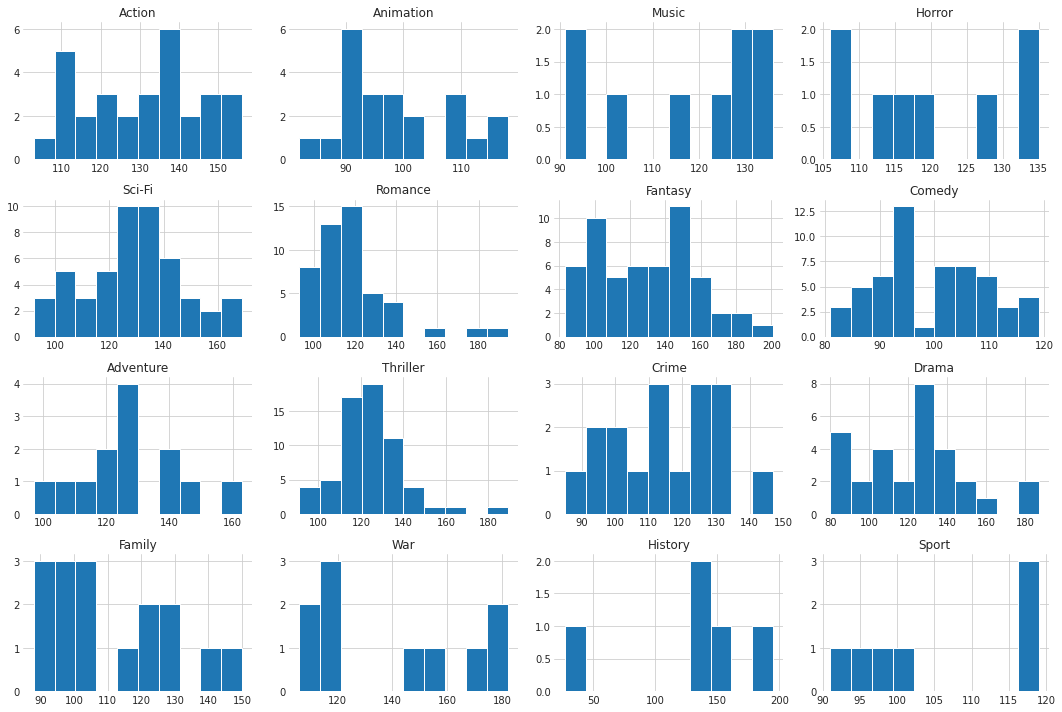

In [ ]:
genres = movies['Main_Genre'].unique()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

for i in range(len(genres)):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    
    genre = genres[i]
    subset = movies[movies['Main_Genre'] == genre]
    ax.hist(subset['length'], bins=10)
    ax.set_title(genre)
    
plt.tight_layout()
plt.show()


## **Zadatak 6: Toplinske karte (Heatmaps)**

Zadnje što nas zanima jest koji filmski studiji izrađuju blockbustere za koji žanr. Postoji mnogo studija i mnogo žanrova. Pri radu s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s posebnim dijagramom (kao što je stupčasti dijagram ili dijagram pravokutnika). U tom slučaju, postaje korisno predstaviti njihov odnos pomoću toplinske karte, gdje brojevi predstavljaju broj kombinacija koji se pojavljuje u skupu podataka. 

Vizualizirajte broj blockbustera koje je napravio svaki studio za svaki žanr. Pomoć: koristite metodu *heatmap()* iz biblioteke Seaborn.

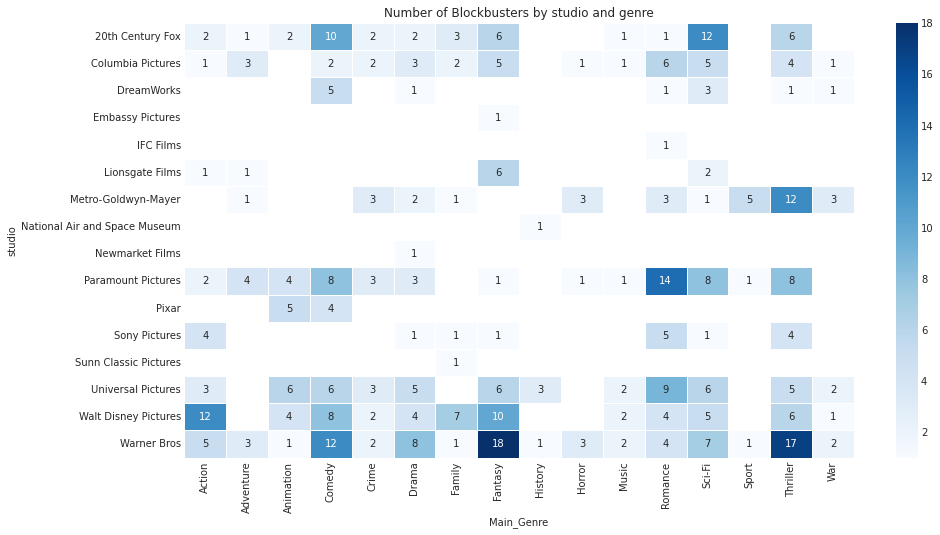

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

counts = movies.groupby(['studio', 'Main_Genre'])['title'].count().unstack()

sns.heatmap(counts, cmap='Blues', annot=True, fmt='g', linewidths=0.5, ax=ax)

plt.title('Number of Blockbusters by studio and genre')
plt.show()


Pomoću izrađene vizualizacije, pokušajte odgovoriti na sljedeća pitanja:

*   U koje žanrove spada većina filmova koje snima studio Warner Bros?
*   Spada u Fantasy, a zatim Thriller 
*   Koji je najuspješniji žanr filmskih filmova Walta Disneya?
*   Najuspješniji žanr filmova Walt Disney Pictures je Action
*   Koji je studio napravio najveći broj ljubavnih blockbustera?
*   Studio Paramount Pictures je napravio najveći broj ljubavnih blockbustera.

